Universidade Federal do Paraná - UFPR

Programa de Pós-Graduação em Informática

Disciplina: Ciência de Dados para Segurança

Professor: Dr. André Ricardo Abed Grégio

Estudantes: Me. Mariane Regina Sponchiado Cassenote;
            Me. Tamy Emily Beppler


> > # **Classificação de Anúncios de Vagas de Emprego**





In [ ]:
# Passo 1 - Montar Google Drive
# Passo exclusivo para execucao no google colab
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Ciência de Dados**

Conforme a Figura 1, os processos da Ciência de Dados podem ser divididos em 5 principais passos:

1.   Obtenção de Dados - Coleta do Dataset;
2.   Limpeza - Filtrar os dados irrelevantes;
3.   Exploração - Inspecionar os dados e suas propriedades;
4.   Desenvolver Modelo - preditor/construtor/agrupador;
5.   Interpretação - Entender o resultado e apresentá-lo.

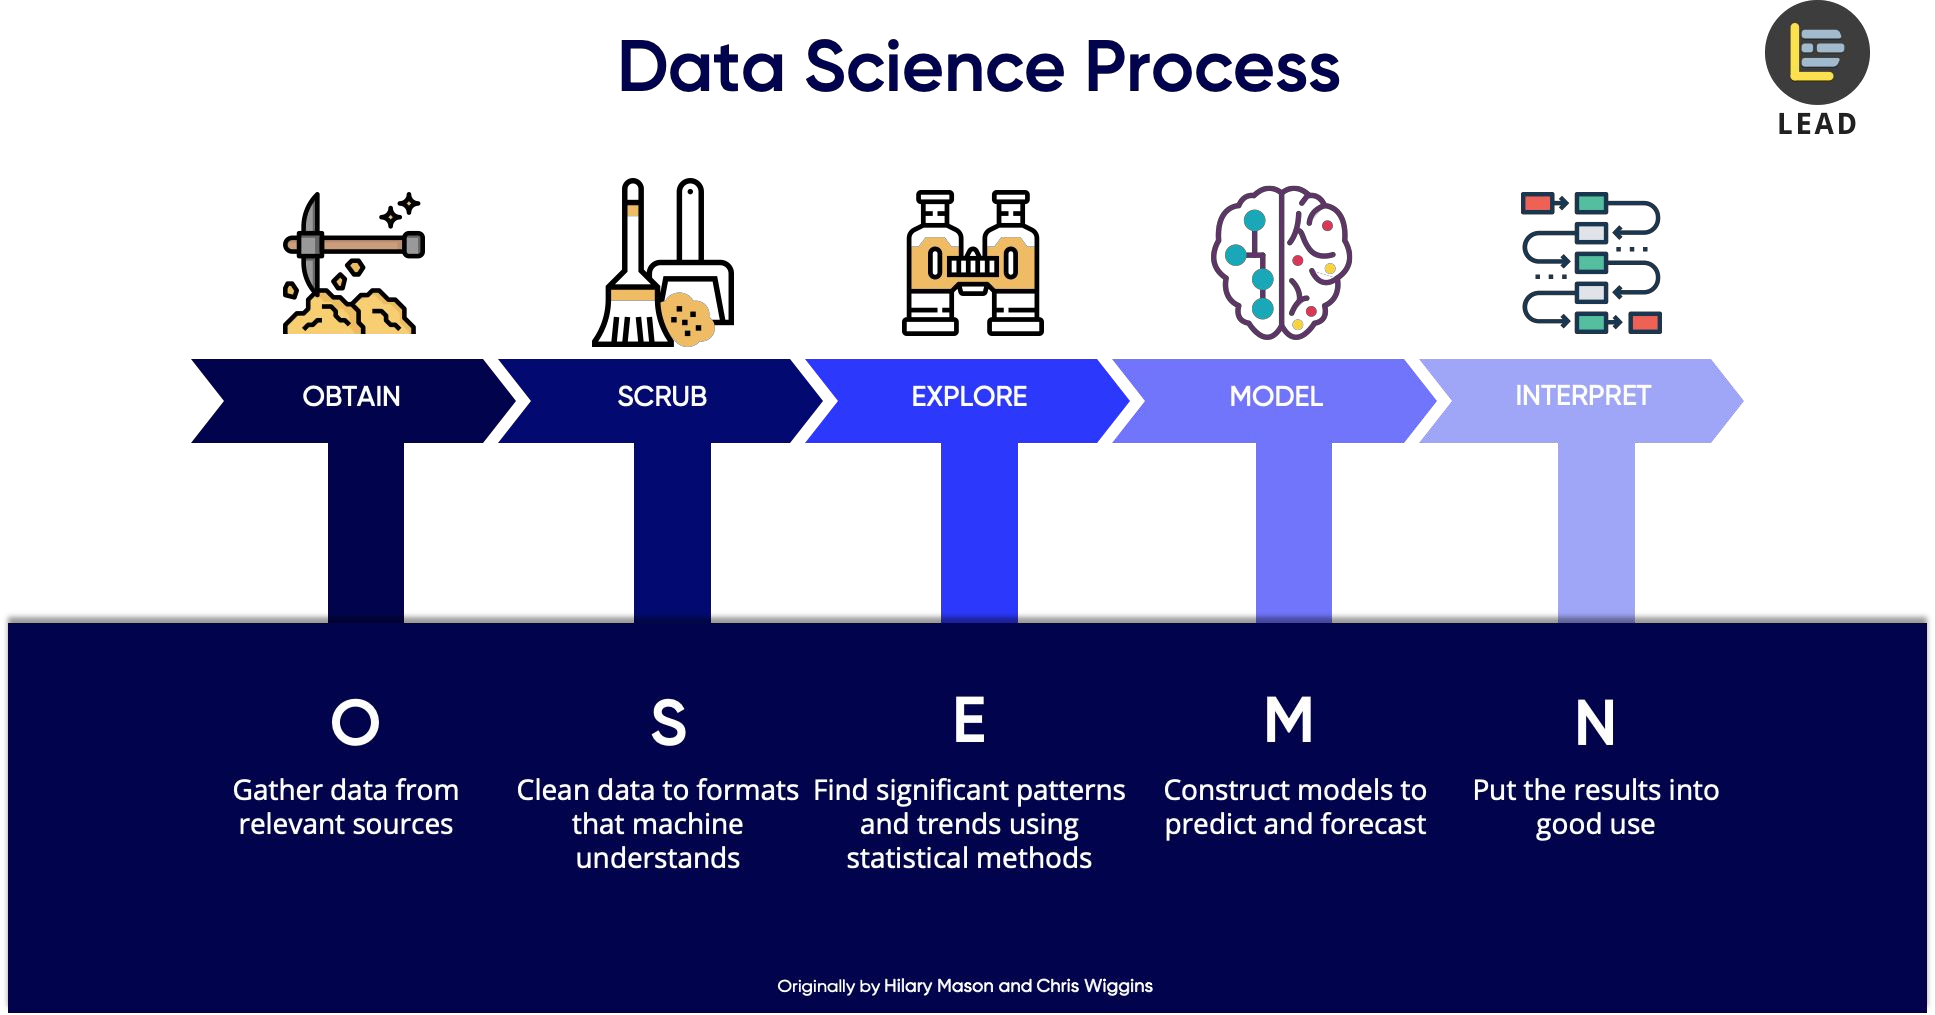
Figura 1 - Processo da Ciência de Dados






**Obtenção de Dados - Coleta**

O dataset foi obtido através do repositório Kaggle, através do link: 
https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

O dataset possui 1 (UM) arquivo .csv contendo 17.880 anúncios de vagas, dos quais aproximadamente 800 são falsos.

Para ler o arquivo csv, utilizamos a biblioteca pandas, que deve ser importada no início do programa.

O arquivo a ser aberto deve ser inserido entre aspas usando a função open(""). Se utilizar o google colab, você pode colar o caminho do diretório do Google Drive onde o arquivo se encontra (conforme linha comentada no código).

É então criado um dataframe pra armazenar esses dados.
Para compreensão dos dados, é importante visualizar o conteúdo do arquivo.

In [1]:
import pandas as pd

# file = open("/content/drive/MyDrive/fake_job_postings.csv")
file = open("fake_job_postings.csv")

df = pd.read_csv(file)
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [2]:
df.describe() # visualizando os dados numericos

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.info() # entendendo as colunas e seus tipos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
# soma NaNs de cada coluna
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
df.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

**Limpeza e Exploração de Dados**

Ao visualizar os dados coletados, é possível identificar o tipo de dado que será modelado.

O dataset possui 18 colunas, sendo 1 referente ao id da amostra, 4 colunas de atributos numéricos e 13 colunas de atributos textuais. As colunas são detalhadas abaixo:

Id:

- job_id

Numéricos:

- telecommuting
- has_company_logo
- has_questions
- fraudulent

Textuais:

- title
- location
- department
- salary_range
- company_profile
- description
- requirements
- benefits
- employment_type
- required_experience
- required_education
- industry
- function

Onde, a coluna "fraudulent", identifica anúncios maliciosos como 1 e não-maliciosos como 0, sendo utilizada para rotular o dataset.
O objetivo da análise desse dataset é identificar anúncios de vagas de emprego fraudulentas, assim como as características comuns nesses anúncios maliciosos.

> Distribuição dos Dados

Esse dataset é altamente desbalanceado, o que torna difícil a tarefa de classificação. Do total de 17880 amostras, temos 17014 anúncios reais e 866 anúncios maliciosos. Também temos diversas amostras com valores nulos que terão de ser tratadas adequadamente.

> Limpeza

Em um primeiro momento, trabalharemos só com os atributos textuais, removendo as demais colunas. Para isso, todos os atributos textuais que não possuem valor, se tornarão apenas um espaço em branco.

In [6]:
df.fillna(" ",inplace = True) # substitui campos com NaN por espaços em branco

# cria coluna única contendo as informações das demais colunas textuais
df['text'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function'] 
df['text']

0        Marketing Intern US, NY, New York Marketing We...
1        Customer Service - Cloud Video Production NZ, ...
2        Commissioning Machinery Assistant (CMA) US, IA...
3        Account Executive - Washington DC US, DC, Wash...
4        Bill Review Manager US, FL, Fort Worth   SpotS...
                               ...                        
17875    Account Director - Distribution  CA, ON, Toron...
17876    Payroll Accountant US, PA, Philadelphia Accoun...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer NG, LA, Lagos     Nemsia Stud...
17879    Web Application Developers NZ, N, Wellington E...
Name: text, Length: 17880, dtype: object

In [7]:
# deleta colunas que já tiveram seus dados unidos na coluna 'text'
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['employment_type']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']

df

,job_id,salary_range,telecommuting,has_company_logo,has_questions,fraudulent,text
0,1,,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,2,,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,3,,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,4,,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,5,,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."
...,...,...,...,...,...,...,...
17875,17876,,0,1,1,0,"Account Director - Distribution CA, ON, Toron..."
17876,17877,,0,1,1,0,"Payroll Accountant US, PA, Philadelphia Accoun..."
17877,17878,,0,0,0,0,Project Cost Control Staff Engineer - Cost Con...
17878,17879,,0,0,1,0,"Graphic Designer NG, LA, Lagos Nemsia Stud..."


Após identificar que a coluna job_id refere-se somente ao número da amostra e a coluna salary_range não contribui significativamente para a análise dos dados por possuir muitas ocorrências de valores nulos (15.012 nulos entre 17.880), estas também são excluídas.

In [8]:
del df['job_id']
del df['salary_range']

df

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."
...,...,...,...,...,...
17875,0,1,1,0,"Account Director - Distribution CA, ON, Toron..."
17876,0,1,1,0,"Payroll Accountant US, PA, Philadelphia Accoun..."
17877,0,0,0,0,Project Cost Control Staff Engineer - Cost Con...
17878,0,0,1,0,"Graphic Designer NG, LA, Lagos Nemsia Stud..."


Removemos amostras duplicadas do dataframe

In [9]:
print("Duplicações antes: " + str(df.duplicated().sum()))
df.drop_duplicates(inplace=True)
print("Duplicações depois: " + str(df.duplicated().sum()))

Duplicações antes: 293
Duplicações depois: 0


**Limpeza do texto**

Trasforma os caracteres em minúsculos; remove pontuação e palavras de pouco valor para o processo de classificação (stopwords)

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def text_cleaning(text):
  text = text.lower()
  text = re.sub("[^a-zA-Z]", " ", text)
  text = text.split()
  text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
  return ' '.join(text)    

df['text'] = df['text'].apply(text_cleaning)

df['text'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'marketing intern u ny new york marketing food created groundbreaking award winning cooking site support connect celebrate home cook give everything need one place top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish well known professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show located chelsea new york city food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid intern work small team editor executive developer new york city headquarters reproducing repackaging existing food content number partner site huffington post yahoo buzzfeed various conten

**Dividir treino/teste**

In [11]:
import numpy as np
 
msk = np.random.rand(len(df)) < 0.8 # cria uma mascara com as posicoes
train = df[msk]
test = df[~msk]
 
train

,telecommuting,has_company_logo,has_questions,fraudulent,text
2,0,1,0,0,commissioning machinery assistant cma u ia wev...
3,0,1,0,0,account executive washington dc u dc washingto...
5,0,0,0,0,accounting clerk u md job overviewapex environ...
6,0,1,1,0,head content f de berlin androidpit founded fo...
8,0,1,1,0,hp bsm sme u fl pensacola solution woman owned...
...,...,...,...,...,...
17875,0,1,1,0,account director distribution ca toronto sale ...
17876,0,1,1,0,payroll accountant u pa philadelphia accountin...
17877,0,0,0,0,project cost control staff engineer cost contr...
17878,0,0,1,0,graphic designer ng la lagos nemsia studio loo...


Gráficos de distribuição de amostras n

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


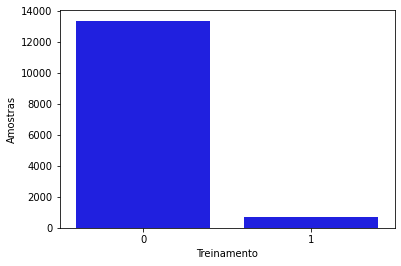

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


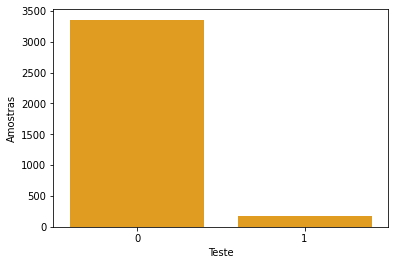

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plottrain = train["fraudulent"].value_counts()
sns.barplot(plottrain.index, plottrain, color="blue", label = "Train")
plt.xlabel("Treinamento")
plt.ylabel("Amostras")
plt.show()

plottest = test["fraudulent"].value_counts()
sns.barplot(plottest.index, plottest, color="orange", label = "Test")
plt.xlabel("Teste")
plt.ylabel("Amostras")
plt.show()

**Extraindo características textuais**

Utilizaremos o TF-IDF (Term Frequency - Inverse Document Frequency) para extrair essas características do texto, através do pacote TfidVectorizer do scikit learn.

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # limitamos a análise às 200 palavras mais comuns no texto
# vectorizer = TfidfVectorizer(max_features=200)
# vectorizer.fit(train['text'].values)

# # transforma os dados em matrizes
# train_features = vectorizer.transform(train['text'].values)
# test_features = vectorizer.transform(test['text'].values)

# # imprime os formatos das matrizes
# print(train_features.shape, test_features.shape)

Em vez do TF-IDF, podemos utilizar o Word2Vec que, além da frequência, também considera a semelhança entre palavras e seus significados. 
OBS.: quando se deseja utilizar o TF-IDF, o bloco de código do Word2Vec deve ser comentado.

In [13]:
from gensim.models import Word2Vec

# classe vectorizer calcula a média das palavras usando Word2Vec
class MeanEmbeddingVectorizer(object):
  def __init__(self, size, min_count=1):
    self.size = size
    self.min_count = 1

  def fit(self, X):
    w2v = Word2Vec(X, size = self.size, min_count = self.min_count)
    self.word2vec = dict(zip(w2v.wv.index2word,w2v.wv.vectors))
    # se um texto está vazio devemos retornar um vetor de zeros
    # com a mesma dimensionalidade de todos os outros vetores
    self.dim = len(list(self.word2vec.values())[0])
    return self
  
  def transform(self, X):
    return np.array([
      np.mean([self.word2vec[w] for w in words if w in self.word2vec] or 
      [np.zeros(self.dim)], axis = 0) for words in X
    ])

# size é o número de dimensões que corresponde ao tamanho da camada 
# escondida que vai gerar a representação
vectorizer = MeanEmbeddingVectorizer(size=200)
vectorizer.fit(train['text'].values)

# faz a transformação dos dados, calculando a média das palavras
train_features = vectorizer.transform(train['text'].values)
test_features = vectorizer.transform(test['text'].values)

# imprime os formatos das matrizes
print(train_features.shape, test_features.shape)

(14051, 200) (3536, 200)


**Características numéricas (normalização)**



In [14]:
# extrai colunas a serem utilizadas
train_num = np.stack((train['telecommuting'], train['has_company_logo'], train['has_questions']), axis = 1)
test_num = np.stack((test['telecommuting'], test['has_company_logo'], test['has_questions']), axis = 1)

from sklearn.preprocessing import MinMaxScaler

# inicializa minmax
scaler = MinMaxScaler(feature_range=(0,1))

# treina minmax e transforma as features
scaler.fit(train_num)
train_num_total = scaler.transform(train_num)
test_num_total = scaler.transform(test_num)

print(train_num_total.shape, test_num_total.shape)

(14051, 3) (3536, 3)


**Juntando as características**

Como possuímos características textuais E numéricas, precisamos juntá-las antes de aplicar ao nosso modelo.


In [15]:
from scipy import sparse

# se usamos o Word2Vec é necessário converter os dados antes de juntar 
# com as características numéricas
trainf = sparse.csr_matrix(train_features)
testf = sparse.csr_matrix(test_features)
                          
train_total = sparse.hstack((train_num_total, trainf))
test_total = sparse.hstack((test_num_total, testf))

train_total.shape

y_train = train['fraudulent']
y_test = test['fraudulent']

**Desenvolver Modelo**

Para os experimentos serão utilizados os algoritmos de KNN (vizinho mais próximo), Random Forest (conjunto de árvores de decisão) e MLP (uma rede neural multi-camadas).

Todos os algoritmos foram implementados usando sua configuração inicial do sci-kit learn. Os únicos valores alterados são exibidos a seguir:

    KNN - número de vizinhos = 3
    MLP - random_state=1 (geração de números aleatórios para pesos e inicialização de polarização), 
          max_iter=300 (número máximo de iterações)

**Interpretação dos Resultados**

Para a avaliação, em todos os experimentos, utilizaremos o sklearn.metrics importando somente as utilizadas conforme listado abaixo:

    I  - Taxa de acurácia: accuracy_score
    II - Taxa de precisão: precision_score
    III- Taxa de erro: mean_absolute_error
    IV - Curva ROC: auc plot_roc_curve roc_auc_score roc_curve
    V  - Matriz de confusão: confusion_matrix plot_confusion_matrix

I - Acurácia

Porcentagem de exemplares que o classificador conseguiu acertar de determinado conjunto.

II - Precisão

Mede a acurácia das predições positivas do classifica-dor, isto é, ela mede a habilidade do classificador não rotular como positivo um exemplar que é negativo.

III - Erro

Calcula o erro absoluto médio, uma métrica de risco correspondente ao valor esperado da perda de erro absoluto. 

IV - Curva ROC

Normalmente apresenta taxa de verdadeiro positivo no eixo Y e taxa de falso positivo no eixo X. Isso significa que o canto superior esquerdo do gráfico é o ponto “ideal” - uma taxa de falso positivo de zero e uma taxa de verdadeiro positivo de um. Isso significa que uma área maior sob a curva (AUC) geralmente é melhor. 

V - Matriz de Confusão

Seja C uma matriz de confusão, C(i,j) é igual ao número de observações em que o classificador considerou um exemplar da classe i como sendo da classe j.

**Experimento 1**

Um treinamento deve ser feito com a porção 1 do dataset (80%). Nesta porção, utilizou-se divisão 80/20 (percentage split) para treino/teste, ou seja, 80% dos 80% para treinamento e 20% dos 80% para teste.

Divisão feita através do scikit-learn modelo: train_test_split com tamanho de teste 0.2 (20%) e 42 como número para "embaralhamento" dos dados antes de dividí-los. 

**Avaliação**

Matriz de confusão, valores de precisão e erro (mean_absolute_error). 
Curva ROC para os modelos gerados individualmente 


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(train_total, y_train, test_size=0.2, random_state=42)

#################### KNN
from sklearn.neighbors import KNeighborsClassifier
vizinhos80 = KNeighborsClassifier(n_neighbors=3)
vizinhos80.fit(X_treino, y_treino)
predictKNN80 = vizinhos80.predict(X_teste)

#################### Random Forest
from sklearn.ensemble import RandomForestClassifier
random80 = RandomForestClassifier()
random80.fit(X_treino, y_treino)
predictRF80 = random80.predict(X_teste)

#################### MLP
from sklearn.neural_network import MLPClassifier
neural80 = MLPClassifier(random_state=1, max_iter=300).fit(X_treino, y_treino)
predictMLP80 = neural80.predict(X_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Taxa de Acuracia KNN:  0.9530416221985059
Taxa de Precisão KNN:  0.6179775280898876
Taxa de Erro KNN:  0.04695837780149413


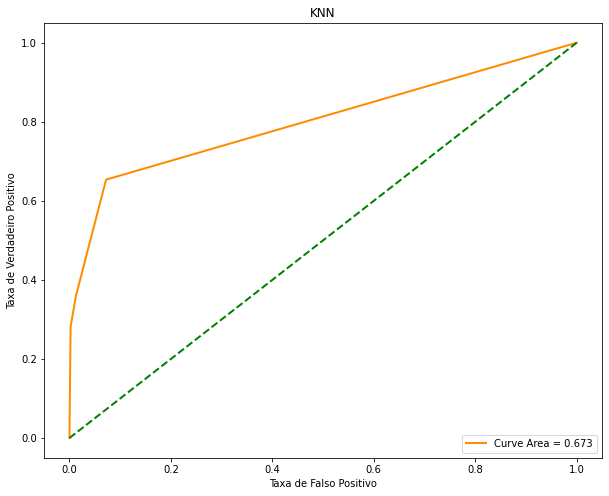

Taxa de Acuracia RF:  0.960156527926005
Taxa de Precisão RF:  1.0
Taxa de Erro RF:  0.039843472073995016


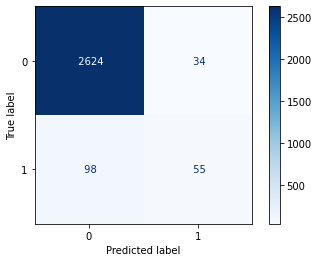

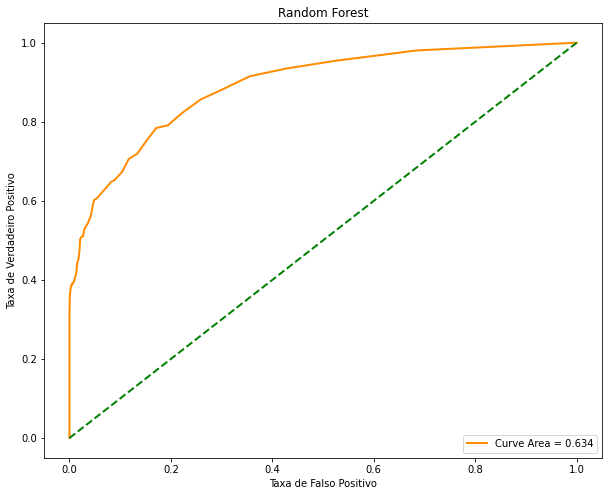

Taxa de Acuracia MLP:  0.9569548203486303
Taxa de Precisão MLP:  0.7962962962962963
Taxa de Erro MLP:  0.04304517965136962


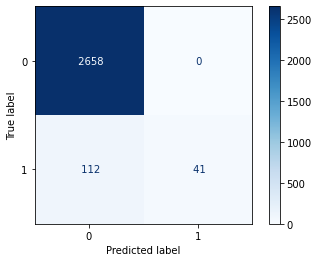

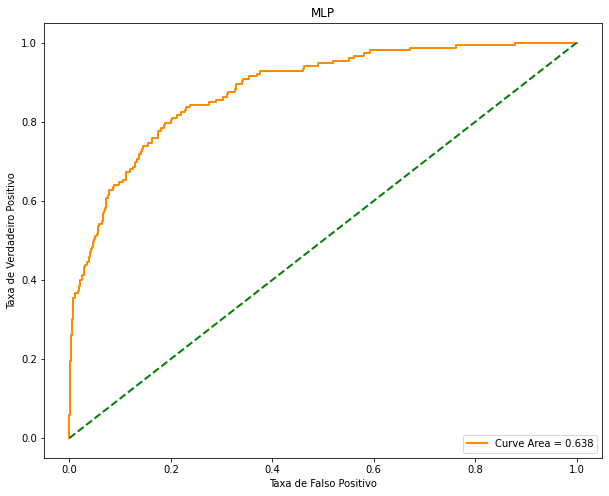

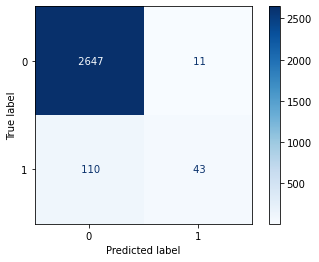

In [17]:
# Avaliacao
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.metrics import f1_score, roc_auc_score,roc_curve, plot_confusion_matrix, precision_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

##################### KNN
print('Taxa de Acuracia KNN: ', accuracy_score(predictKNN80, y_teste))
print('Taxa de Precisão KNN: ', precision_score(y_teste, predictKNN80))
print('Taxa de Erro KNN: ', mean_absolute_error(predictKNN80, y_teste))
fpr, tpr, thr = roc_curve(y_teste, vizinhos80.predict_proba(X_teste)[:,1])
#auc = auc(fpr, tpr)
auc = roc_auc_score(y_teste, predictKNN80)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('KNN')
plt.legend(loc="lower right")
plt.show()
plot_confusion_matrix(vizinhos80, X_teste, y_teste, cmap='Blues', values_format=' ')

##################### RF
print('Taxa de Acuracia RF: ', accuracy_score(predictRF80, y_teste))
print('Taxa de Precisão RF: ', precision_score(y_teste, predictRF80))
print('Taxa de Erro RF: ', mean_absolute_error(predictRF80, y_teste))
fpr, tpr, thr = roc_curve(y_teste, random80.predict_proba(X_teste)[:,1])
#auc = auc(fpr, tpr)
auc = roc_auc_score(y_teste, predictRF80)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()
plot_confusion_matrix(random80, X_teste, y_teste, cmap='Blues', values_format=' ')

##################### MLP
print('Taxa de Acuracia MLP: ', accuracy_score(predictMLP80, y_teste))
print('Taxa de Precisão MLP: ', precision_score(y_teste, predictMLP80))
print('Taxa de Erro MLP: ', mean_absolute_error(predictMLP80, y_teste))
fpr, tpr, thr = roc_curve(y_teste, neural80.predict_proba(X_teste)[:,1])
#auc = auc(fpr, tpr)
auc = roc_auc_score(y_teste, predictMLP80)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('MLP')
plt.legend(loc="lower right")
plt.show()
plot_confusion_matrix(neural80, X_teste, y_teste, cmap='Blues', values_format=' ')

**Experimento 2**

Um treinamento/teste deve ser feito usando validação cruzada com 5 pastas (k-fold cross validation com k = 5). Este treinamento usa a mesma porção de 80% das amostras separadas no item 1.

Divisão feita através do scikit-learn modelo: StratifiedKFold com número de pastas = 5 e demais configurações *default*. 

**Avaliação**

Matriz de confusão, valores de precisão e erro para cada pasta e cada modelo. 
Curva ROC para cada modelo. 


Matriz de confusão KNN: 
 [[0.94165777 0.00996087]
 [0.03664176 0.01173959]]
Taxa de Acuracia KNN:  0.9533973674848808
Taxa de Precisão KNN:  0.5409836065573771
Taxa de Erro KNN:  0.046602632515119174
Matriz de confusão RF: 
 [[9.50907150e-01 7.11490573e-04]
 [4.16221985e-02 6.75916044e-03]]
Taxa de Acuracia RF:  0.9576663109213803
Taxa de Precisão RF:  0.9047619047619048
Taxa de Erro RF:  0.04233368907861971
Matriz de confusão MLP: 
 [[0.93987905 0.01173959]
 [0.04375667 0.00462469]]
Taxa de Acuracia MLP:  0.9445037353255069
Taxa de Precisão MLP:  0.2826086956521739
Taxa de Erro MLP:  0.05549626467449306


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Matriz de confusão KNN: 
 [[0.94128114 0.01067616]
 [0.0316726  0.01637011]]
Taxa de Acuracia KNN:  0.9576512455516014
Taxa de Precisão KNN:  0.6052631578947368
Taxa de Erro KNN:  0.04234875444839858
Matriz de confusão RF: 
 [[0.9519573  0.        ]
 [0.03487544 0.01316726]]
Taxa de Acuracia RF:  0.9651245551601424
Taxa de Precisão RF:  1.0
Taxa de Erro RF:  0.034875444839857654
Matriz de confusão MLP: 
 [[0.94483986 0.00711744]
 [0.03594306 0.01209964]]
Taxa de Acuracia MLP:  0.9569395017793594
Taxa de Precisão MLP:  0.6296296296296297
Taxa de Erro MLP:  0.04306049822064057


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Matriz de confusão KNN: 
 [[0.94483986 0.00711744]
 [0.03309609 0.01494662]]
Taxa de Acuracia KNN:  0.9597864768683274
Taxa de Precisão KNN:  0.6774193548387096
Taxa de Erro KNN:  0.0402135231316726
Matriz de confusão RF: 
 [[0.9519573  0.        ]
 [0.04163701 0.00640569]]
Taxa de Acuracia RF:  0.9583629893238435
Taxa de Precisão RF:  1.0
Taxa de Erro RF:  0.041637010676156584
Matriz de confusão MLP: 
 [[0.94946619 0.0024911 ]
 [0.04448399 0.00355872]]
Taxa de Acuracia MLP:  0.9530249110320285
Taxa de Precisão MLP:  0.5882352941176471
Taxa de Erro MLP:  0.04697508896797153
Matriz de confusão KNN: 
 [[0.93843416 0.01316726]
 [0.02455516 0.02384342]]
Taxa de Acuracia KNN:  0.9622775800711744
Taxa de Precisão KNN:  0.6442307692307693
Taxa de Erro KNN:  0.03772241992882562
Matriz de confusão RF: 
 [[9.51245552e-01 3.55871886e-04]
 [3.09608541e-02 1.74377224e-02]]
Taxa de Acuracia RF:  0.9686832740213523
Taxa de Precisão RF:  0.98
Taxa de Erro RF:  0.03131672597864769
Matriz de confusão ML

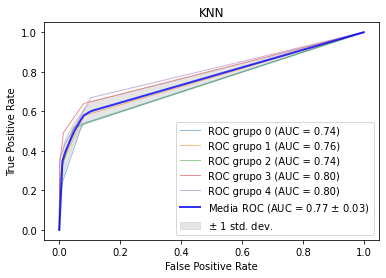

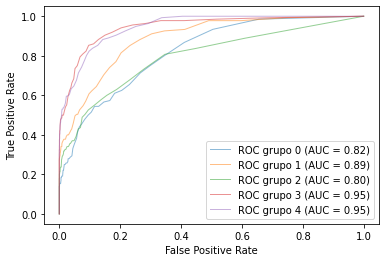

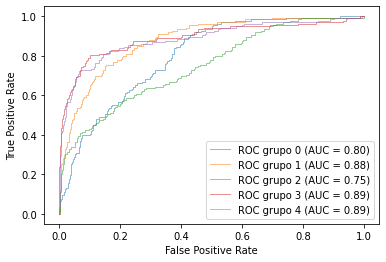

In [18]:
#Em cima dos 80%
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

#kfold - para funcionar o skf
X = train_total.tocsr()
y = y_train
y = y.to_numpy()
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

skf = StratifiedKFold(n_splits=5)

#dados para curva ROC KNN:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

#dados para curva ROC RF:
tprs2 = []
aucs2 = []
mean_fpr2 = np.linspace(0, 1, 100)
fig2, ax2 = plt.subplots()

#dados para curva ROC MLP:
tprs3 = []
aucs3 = []
mean_fpr3 = np.linspace(0, 1, 100)
fig3, ax3 = plt.subplots()

i=0 #contador do nome da pasta
for train_index, test_index in skf.split(X, y): #separa em 5 e para cada 5 faz:
     X_treino, X_teste = X[train_index], X[test_index]
     y_treino, y_teste = y[train_index], y[test_index]
     
     ###################### KNN
     clfknn = []
     clfknn = KNeighborsClassifier(n_neighbors=3)
     # Training
     clfknn.fit(X_treino, y_treino)
     # Testing
     y_predictKNN = []
     y_predictKNN = clfknn.predict(X_teste)

     ###################### Random Forest
     clfrf = []
     clfrf = RandomForestClassifier()
     # Training
     clfrf.fit(X_treino, y_treino)
     # Testing
     y_predictRF = []
     y_predictRF = clfrf.predict(X_teste)

     #################### MLP
     clfmlp = []
     clfmlp = MLPClassifier(random_state=1, max_iter=300).fit(X_treino, y_treino)
     # Training
     clfmlp.fit(X_treino, y_treino)
     # Testing
     y_predictMLP = []
     y_predictMLP = clfmlp.predict(X_teste)
    
# Compute confusion matrix
     print('Matriz de confusão KNN: \n', confusion_matrix(y_teste, y_predictKNN, normalize='all'))
     print('Taxa de Acuracia KNN: ', accuracy_score(y_predictKNN, y_teste))
     print('Taxa de Precisão KNN: ', precision_score(y_teste,y_predictKNN))
     print('Taxa de Erro KNN: ', mean_absolute_error(y_predictKNN, y_teste))
     
     print('Matriz de confusão RF: \n', confusion_matrix(y_teste, y_predictRF, normalize='all'))
     print('Taxa de Acuracia RF: ', accuracy_score(y_predictRF, y_teste))
     print('Taxa de Precisão RF: ', precision_score(y_teste,y_predictRF))
     print('Taxa de Erro RF: ', mean_absolute_error(y_predictRF, y_teste))

     print('Matriz de confusão MLP: \n', confusion_matrix(y_teste, y_predictMLP, normalize='all'))
     print('Taxa de Acuracia MLP: ', accuracy_score(y_predictMLP, y_teste))
     print('Taxa de Precisão MLP: ', precision_score(y_teste,y_predictMLP))
     print('Taxa de Erro MLP: ', mean_absolute_error(y_predictMLP, y_teste))

#Curva ROC 

     #### KNN
     viz = plot_roc_curve(clfknn, X_teste, y_teste, name='ROC grupo {}'.format(i), alpha=0.5, lw=1, ax=ax)
     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
     interp_tpr[0] = 0.0
     tprs.append(interp_tpr)
     aucs.append(viz.roc_auc)

     #### RF
     viz2 = plot_roc_curve(clfrf, X_teste, y_teste, name='ROC grupo {}'.format(i), alpha=0.5, lw=1, ax=ax2)
     interp_tpr2 = np.interp(mean_fpr2, viz2.fpr, viz2.tpr)
     interp_tpr2[0] = 0.0
     tprs2.append(interp_tpr2)
     aucs2.append(viz2.roc_auc)

     #### MLP
     viz3 = plot_roc_curve(clfmlp, X_teste, y_teste, name='ROC grupo {}'.format(i), alpha=0.5, lw=1, ax=ax3)
     interp_tpr3 = np.interp(mean_fpr3, viz3.fpr, viz3.tpr)
     interp_tpr3[0] = 0.0
     tprs3.append(interp_tpr3)
     aucs3.append(viz3.roc_auc)
     
     i=i+1

#KNN
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b', label=r'Media ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="KNN")
ax.legend(loc="lower right")
plt.show()


#RF
mean_tpr2 = np.mean(tprs2, axis=0)
mean_tpr2[-1] = 1.0
mean_auc2 = auc(mean_fpr2, mean_tpr2)
std_auc2 = np.std(aucs2)
ax2.plot(mean_fpr2, mean_tpr2, color='b', label=r'Media ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc2, std_auc2), lw=2, alpha=.8)

std_tpr2 = np.std(tprs2, axis=0)
tprs_upper2 = np.minimum(mean_tpr2 + std_tpr2, 1)
tprs_lower2 = np.maximum(mean_tpr2 - std_tpr2, 0)
ax2.fill_between(mean_fpr2, tprs_lower2, tprs_upper2, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax2.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="RF")
ax2.legend(loc="lower right")
plt.show()


#MLP
mean_tpr3 = np.mean(tprs3, axis=0)
mean_tpr3[-1] = 1.0
mean_auc3 = auc(mean_fpr3, mean_tpr3)
std_auc3 = np.std(aucs3)
ax3.plot(mean_fpr3, mean_tpr3, color='b', label=r'Media ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc3, std_auc3), lw=2, alpha=.8)

std_tpr3 = np.std(tprs3, axis=0)
tprs_upper3 = np.minimum(mean_tpr3 + std_tpr3, 1)
tprs_lower3 = np.maximum(mean_tpr3 - std_tpr3, 0)
ax3.fill_between(mean_fpr3, tprs_lower3, tprs_upper3, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax3.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="MLP")
ax3.legend(loc="lower right")
plt.show()

**Experimento 3**

Utilizar a porção 2 do dataset (20%) como “dados de produção não-rotulados” e refazer os passos 2 e 3 (somente teste do modelo) acima listados.

Esse experimento foi subdividido em duas etapas:

      1 - Utilizou-se o dataset completo, com os 80% usados nos experimentos passados como TREINAMENTO e os 20% como TESTE
      2 - Utilizou-se apenas os 20% anteriormente separados para teste e, usando validação cruzada com 5 pastas, realizou-se o experimento anterior.


In [19]:
y_train = train['fraudulent']
y_test = test['fraudulent']

#Etapa 1 - Dataset Completo

#################### KNN
from sklearn.neighbors import KNeighborsClassifier
vizinhos = KNeighborsClassifier(n_neighbors=3)
vizinhos.fit(train_total, y_train)
predictKNN=vizinhos.predict(test_total)

#################### Random Forest
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(train_total, y_train)
predictRF=random.predict(test_total)

#################### MLP
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(random_state=1, max_iter=300).fit(train_total, y_train)
predictMLP=neural.predict(test_total)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Taxa de Acuracia KNN:  0.9601244343891403
Taxa de Precisão KNN:  0.6697247706422018
Taxa de Erro KNN:  0.039875565610859726


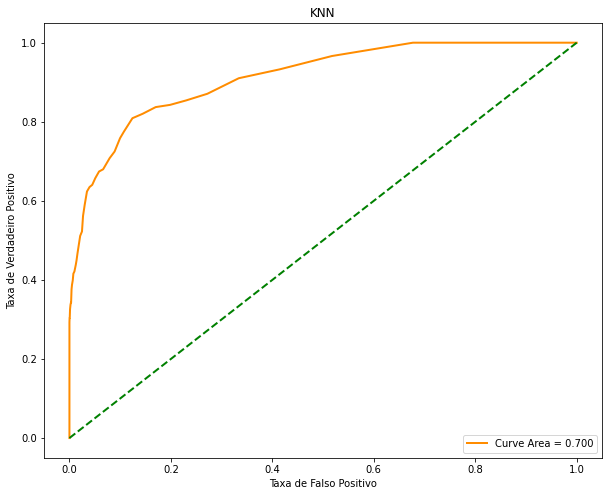

Taxa de Acuracia MLP:  0.9629524886877828
Taxa de Precisão MLP:  1.0
Taxa de Erro MLP:  0.037047511312217195


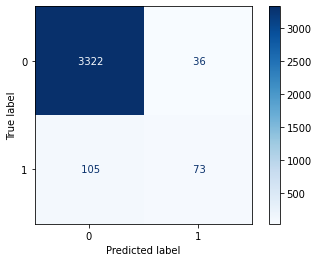

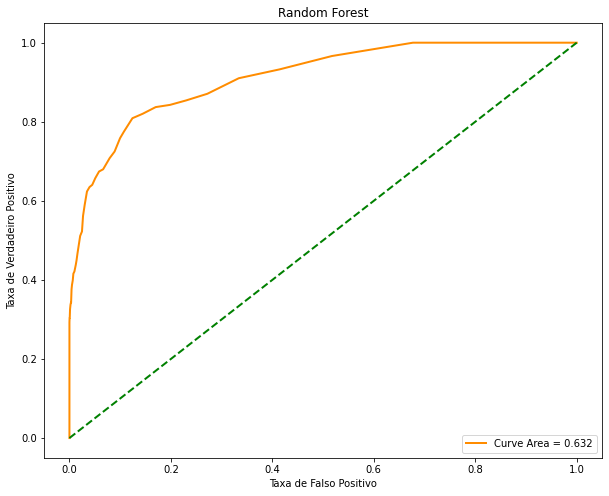

Taxa de Acuracia MLP:  0.9561651583710408
Taxa de Precisão MLP:  0.676923076923077
Taxa de Erro MLP:  0.04383484162895927


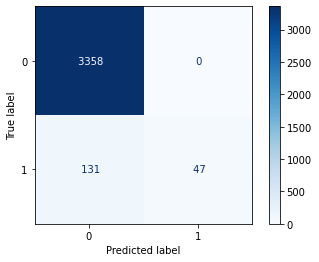

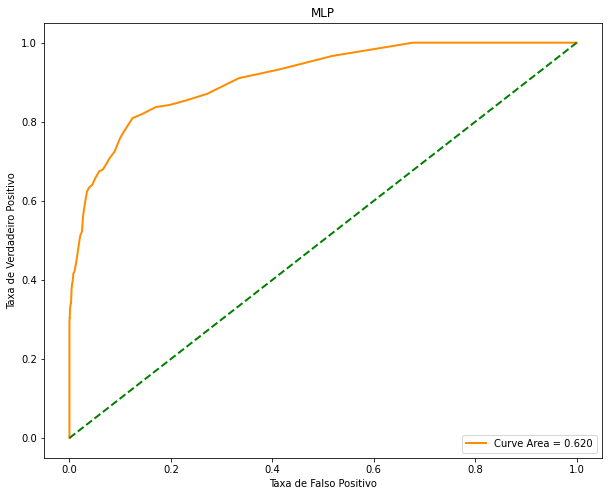

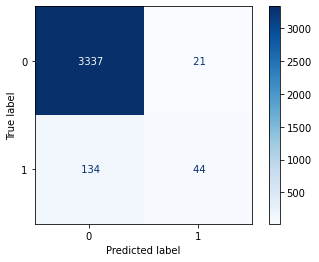

In [20]:
#Avaliação Dataset Completo

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, roc_auc_score,roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

#resultado KNN
print('Taxa de Acuracia KNN: ', accuracy_score(predictKNN, y_test))
print('Taxa de Precisão KNN: ', precision_score(y_test, predictKNN))
print('Taxa de Erro KNN: ', mean_absolute_error(predictKNN, y_test))
fpr, tpr, thr = roc_curve(y_test, random.predict_proba(test_total)[:,1])
#auc = auc(fpr, tpr)
auc = roc_auc_score(y_test, predictKNN)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('KNN')
plt.legend(loc="lower right")
plt.show()
plot_confusion_matrix(vizinhos, test_total, y_test, cmap='Blues', values_format=' ')

#resultado RF
print('Taxa de Acuracia MLP: ', accuracy_score(predictRF, y_test))
print('Taxa de Precisão MLP: ', precision_score(y_test, predictRF))
print('Taxa de Erro MLP: ', mean_absolute_error(predictRF, y_test))
fpr, tpr, thr = roc_curve(y_test, random.predict_proba(test_total)[:,1])
#auc = auc(fpr, tpr)
auc = roc_auc_score(y_test, predictRF)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()
plot_confusion_matrix(random, test_total, y_test, cmap='Blues', values_format=' ')

#Resultado MLP
print('Taxa de Acuracia MLP: ', accuracy_score(predictMLP, y_test))
print('Taxa de Precisão MLP: ', precision_score(y_test, predictMLP))
print('Taxa de Erro MLP: ', mean_absolute_error(predictMLP, y_test))
fpr, tpr, thr = roc_curve(y_test, random.predict_proba(test_total)[:,1])
#auc = auc(fpr, tpr)
auc = roc_auc_score(y_test, predictMLP)
lw = 2
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('MLP')
plt.legend(loc="lower right")
plt.show()
plot_confusion_matrix(neural, test_total, y_test, cmap='Blues', values_format=' ')

**Etapa 2**


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Matriz de confusão KNN: 
 [[0.94491525 0.00423729]
 [0.0480226  0.00282486]]
Taxa de Acuracia KNN:  0.9477401129943502
Taxa de Precisão KNN:  0.4
Taxa de Erro KNN:  0.052259887005649715
Matriz de confusão RF: 
 [[0.94774011 0.00141243]
 [0.04661017 0.00423729]]
Taxa de Acuracia RF:  0.9519774011299436
Taxa de Precisão RF:  0.75
Taxa de Erro RF:  0.0480225988700565
Matriz de confusão MLP: 
 [[0.94491525 0.00423729]
 [0.05084746 0.        ]]
Taxa de Acuracia MLP:  0.9449152542372882
Taxa de Precisão MLP:  0.0
Taxa de Erro MLP:  0.05508474576271186


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Matriz de confusão KNN: 
 [[0.93917963 0.01131542]
 [0.04384724 0.00565771]]
Taxa de Acuracia KNN:  0.9448373408769448
Taxa de Precisão KNN:  0.3333333333333333
Taxa de Erro KNN:  0.055162659123055166
Matriz de confusão RF: 
 [[0.94908062 0.00141443]
 [0.03960396 0.00990099]]
Taxa de Acuracia RF:  0.958981612446959
Taxa de Precisão RF:  0.875
Taxa de Erro RF:  0.04101838755304102
Matriz de confusão MLP: 
 [[0.94200849 0.00848656]
 [0.03960396 0.00990099]]
Taxa de Acuracia MLP:  0.9519094766619519
Taxa de Precisão MLP:  0.5384615384615384
Taxa de Erro MLP:  0.04809052333804809
Matriz de confusão KNN: 
 [[0.93776521 0.01272984]
 [0.04243281 0.00707214]]
Taxa de Acuracia KNN:  0.9448373408769448
Taxa de Precisão KNN:  0.35714285714285715
Taxa de Erro KNN:  0.055162659123055166
Matriz de confusão RF: 
 [[0.95049505 0.        ]
 [0.04950495 0.        ]]
Taxa de Acuracia RF:  0.9504950495049505
Taxa de Precisão RF:  0.0
Taxa de Erro RF:  0.04950495049504951
Matriz de confusão MLP: 
 [[0.9434

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Matriz de confusão KNN: 
 [[0.94200849 0.00707214]
 [0.03677511 0.01414427]]
Taxa de Acuracia KNN:  0.9561527581329562
Taxa de Precisão KNN:  0.6666666666666666
Taxa de Erro KNN:  0.04384724186704385
Matriz de confusão RF: 
 [[0.9476662  0.00141443]
 [0.04526167 0.00565771]]
Taxa de Acuracia RF:  0.9533239038189534
Taxa de Precisão RF:  0.8
Taxa de Erro RF:  0.04667609618104668
Matriz de confusão MLP: 
 [[0.94342291 0.00565771]
 [0.04384724 0.00707214]]
Taxa de Acuracia MLP:  0.9504950495049505
Taxa de Precisão MLP:  0.5555555555555556
Taxa de Erro MLP:  0.04950495049504951


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Matriz de confusão KNN: 
 [[0.93917963 0.00990099]
 [0.03536068 0.0155587 ]]
Taxa de Acuracia KNN:  0.9547383309759547
Taxa de Precisão KNN:  0.6111111111111112
Taxa de Erro KNN:  0.04526166902404526
Matriz de confusão RF: 
 [[0.94908062 0.        ]
 [0.04243281 0.00848656]]
Taxa de Acuracia RF:  0.9575671852899575
Taxa de Precisão RF:  1.0
Taxa de Erro RF:  0.042432814710042434
Matriz de confusão MLP: 
 [[0.9476662  0.00141443]
 [0.04384724 0.00707214]]
Taxa de Acuracia MLP:  0.9547383309759547
Taxa de Precisão MLP:  0.8333333333333334
Taxa de Erro MLP:  0.04526166902404526


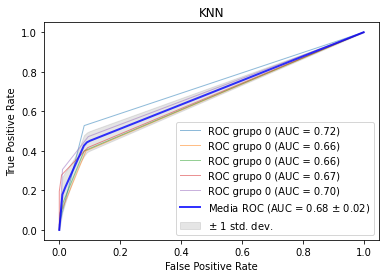

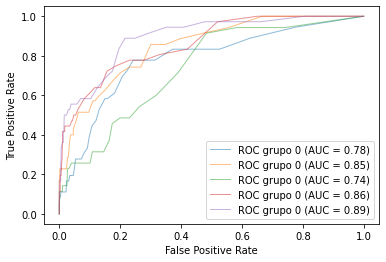

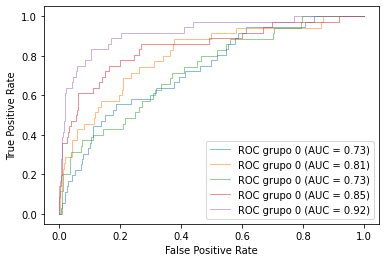

In [21]:
#Etapa 2

#Em cima dos 20%
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

#kfold - para funcionar o skf
X = test_total.tocsr()
y = y_test
y = y.to_numpy()
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

skf = StratifiedKFold(n_splits=5)

#dados para curva ROC KNN:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

#dados para curva ROC RF:
tprs2 = []
aucs2 = []
mean_fpr2 = np.linspace(0, 1, 100)
fig2, ax2 = plt.subplots()

#dados para curva ROC MLP:
tprs3 = []
aucs3 = []
mean_fpr3 = np.linspace(0, 1, 100)
fig3, ax3 = plt.subplots()

for train_index, test_index in skf.split(X, y): #separa em 5 e para cada 5 faz:
     X_treino, X_teste = X[train_index], X[test_index]
     y_treino, y_teste = y[train_index], y[test_index]
     
     ###################### KNN
     clfknn = []
     clfknn = KNeighborsClassifier(n_neighbors=3)
     # Training
     clfknn.fit(X_treino, y_treino)
     # Testing
     y_predictKNN = []
     y_predictKNN = clfknn.predict(X_teste)

    ###################### Random Forest
     clfrf = []
     clfrf = RandomForestClassifier()
     # Training
     clfrf.fit(X_treino, y_treino)
     # Testing
     y_predictRF = []
     y_predictRF = clfrf.predict(X_teste)

     #################### MLP
     clfmlp = []
     clfmlp = MLPClassifier(random_state=1, max_iter=300).fit(X_treino, y_treino)
     # Training
     clfmlp.fit(X_treino, y_treino)
     # Testing
     y_predictMLP = []
     y_predictMLP = clfmlp.predict(X_teste)
    
# Compute confusion matrix
     print('Matriz de confusão KNN: \n', confusion_matrix(y_teste, y_predictKNN, normalize='all'))
     print('Taxa de Acuracia KNN: ', accuracy_score(y_predictKNN, y_teste))
     print('Taxa de Precisão KNN: ', precision_score(y_teste,y_predictKNN))
     print('Taxa de Erro KNN: ', mean_absolute_error(y_predictKNN, y_teste))
     
     print('Matriz de confusão RF: \n', confusion_matrix(y_teste, y_predictRF, normalize='all'))
     print('Taxa de Acuracia RF: ', accuracy_score(y_predictRF, y_teste))
     print('Taxa de Precisão RF: ', precision_score(y_teste,y_predictRF))
     print('Taxa de Erro RF: ', mean_absolute_error(y_predictRF, y_teste))

     print('Matriz de confusão MLP: \n', confusion_matrix(y_teste, y_predictMLP, normalize='all'))
     print('Taxa de Acuracia MLP: ', accuracy_score(y_predictMLP, y_teste))
     print('Taxa de Precisão MLP: ', precision_score(y_teste,y_predictMLP))
     print('Taxa de Erro MLP: ', mean_absolute_error(y_predictMLP, y_teste))

#Curva ROC 
     i=0 #contador do nome da pasta

     #### KNN
     viz = plot_roc_curve(clfknn, X_teste, y_teste, name='ROC grupo {}'.format(i), alpha=0.5, lw=1, ax=ax)
     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
     interp_tpr[0] = 0.0
     tprs.append(interp_tpr)
     aucs.append(viz.roc_auc)

     #### RF
     viz2 = plot_roc_curve(clfrf, X_teste, y_teste, name='ROC grupo {}'.format(i), alpha=0.5, lw=1, ax=ax2)
     interp_tpr2 = np.interp(mean_fpr2, viz2.fpr, viz2.tpr)
     interp_tpr2[0] = 0.0
     tprs2.append(interp_tpr2)
     aucs2.append(viz2.roc_auc)

     #### MLP
     viz3 = plot_roc_curve(clfmlp, X_teste, y_teste, name='ROC grupo {}'.format(i), alpha=0.5, lw=1, ax=ax3)
     interp_tpr3 = np.interp(mean_fpr3, viz3.fpr, viz3.tpr)
     interp_tpr3[0] = 0.0
     tprs3.append(interp_tpr3)
     aucs3.append(viz3.roc_auc)
     
     i=i+1

#KNN
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b', label=r'Media ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="KNN")
ax.legend(loc="lower right")
plt.show()


#RF
mean_tpr2 = np.mean(tprs2, axis=0)
mean_tpr2[-1] = 1.0
mean_auc2 = auc(mean_fpr2, mean_tpr2)
std_auc2 = np.std(aucs2)
ax2.plot(mean_fpr2, mean_tpr2, color='b', label=r'Media ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc2, std_auc2), lw=2, alpha=.8)

std_tpr2 = np.std(tprs2, axis=0)
tprs_upper2 = np.minimum(mean_tpr2 + std_tpr2, 1)
tprs_lower2 = np.maximum(mean_tpr2 - std_tpr2, 0)
ax2.fill_between(mean_fpr2, tprs_lower2, tprs_upper2, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax2.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="RF")
ax2.legend(loc="lower right")
plt.show()


#MLP
mean_tpr3 = np.mean(tprs3, axis=0)
mean_tpr3[-1] = 1.0
mean_auc3 = auc(mean_fpr3, mean_tpr3)
std_auc3 = np.std(aucs3)
ax3.plot(mean_fpr3, mean_tpr3, color='b', label=r'Media ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc3, std_auc3), lw=2, alpha=.8)

std_tpr3 = np.std(tprs3, axis=0)
tprs_upper3 = np.minimum(mean_tpr3 + std_tpr3, 1)
tprs_lower3 = np.maximum(mean_tpr3 - std_tpr3, 0)
ax3.fill_between(mean_fpr3, tprs_lower3, tprs_upper3, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax3.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="MLP")
ax3.legend(loc="lower right")
plt.show()

# Discussão

Este trabalho teve por objetivo a classificação automática de anúncios de emprego entre reais ou maliciosos. A identificação desse tipo de anúncios falsos é importante porque podem ser utilizados para roubar dados pessoais e/ou bancários de pessoas que se candidatam à vaga de emprego.

O dataset utilizado mostrou-se altamente desbalanceado, uma vez que das 17880 amostras analisadas, somente 866 são maliciosas. Observou-se uma grande quantidade de valores nulos no dataset (por exemplo, 15012 no campo 'salary_range', 11547 no campo 'department' e 8105 em 'required education'), o que dificulta a identificação de características que sejam fortemente determinantes no processo de classificação. Com exceção de 'title', 'location' e 'description', todas os os atributos textuais possuem milhares de valores nulos.

A fim de executar a análise dos anúncios, unimos os valores de todos os atributos textuais em uma única coluna e mantivemos os atributos numéricos tais como no dataset inicial. Os atributos 'job_id' e 'salary_range' foram deletados por se tratar somente de um identificador da amostra e por possuir muitos valores nulos, respectivamente. Removemos também as duplicações de amostras do dataset para que não influenciassem no processo de classificação.

Para normalizar as características textuais, fizemos a limpeza do texto por meio da transformação de todos os caracteres em minúsculos, remoção de pontuação e de caracteres não-alfabéticos e palavras da língua inglesa com pouco valor para o processo de classificação (stopwords).

Em seguida, dividimos o dataset em duas porções, 80% e 20%. Para extração de características textuais, usamos tanto o método TF-IDF (que considera a frequência dos termos no texto), quanto o Word2Vec (que considera também a semelhança entre palavras e seus significados).

Pra os experimentos, utilizamos os algoritmos KNN, Random Forest e MLP. Todos os algoritmos foram implementados usando sua configuração inicial do sci-kit learn, com exceção do número de vizinhos = 3 no KNN e número máximo de iterações = 300 no MLP.

Para a avaliação, em todos os experimentos, utilizamos o sklearn.metrics conforme listado abaixo:
I - Acurácia (accuracy_score)
Porcentagem de exemplares que o classificador conseguiu acertar de determinado conjunto.
II - Precisão (precision_score)
Mede a acurácia das predições positivas do classificador, isto é, ela mede a habilidade do classificador não rotular como positivo um exemplar que é negativo.
III - Erro (mean_absolute_error)
Calcula o erro absoluto médio, uma métrica de risco correspondente ao valor esperado da perda de erro absoluto. 
IV - Curva ROC (auc plot_roc_curve roc_auc_score roc_curve)
Normalmente apresenta taxa de verdadeiro positivo no eixo Y e taxa de falso positivo no eixo X. Isso significa que o canto superior esquerdo do gráfico é o ponto “ideal” - uma taxa de falso positivo de zero e uma taxa de verdadeiro positivo de um. Isso significa que uma área maior sob a curva (AUC) geralmente é melhor. 
V - Matriz de Confusão (confusion_matrix plot_confusion_matrix)
Seja C uma matriz de confusão, C(i,j) é igual ao número de observações em que o classificador considerou um exemplar da classe i como sendo da classe j.

No primeiro experimento utilizamos a primeira porção do dataset, correspondente a 80% do dataset completo, na proporção de 80/20 para treino/teste. Os resultados detalhados podem ser observados nas taxas de acurácia, precisão e erro, assim como nas curvas ROC e matrizes de confusão. Os três algoritmos apresentaram acurácia acima de 95%, enquanto a taxa de precisão variou de 60 a 97% e taxa de erro cerca de 0.04%.

No experimento 2 realizamos o teste de validação cruzada com 5 pastas ainda com a primeira porção de 80% do dataset completo. E observou-se a mesma tendência dos resultados do experimento anterior.

Por fim, na primeira etapa do experimento 3 utilizamos a segunda porção correspondente a 20% do dataset completo como "dados de produção não-rotulados". Com isso, os 80% do dataset completo foram usados como treinamento e os 20% restantes como teste. Nesse experimento também obteve-se acurácia acima de 95% nos três algoritmos, taxa de precisão um pouco melhor variano de 66 a 100% e erro abaixo de 0.04 na maioria dos casos.

Na segunda etapa do experimento 3 realizamos o teste de validação cruzada com 5 pastas com os 20% do dataset completo. 

Nos três experimentos podemos observar acurácias altas, erros consideráveis, mas taxas de precisão um pouco mais baixa. Isso indica que nossos modelos obtém bom desempenho ao classificar corretamente anúncios reais, mas se deterioram ao identificar anúncios maliciosos. No entanto, cabe salientar o bom desempenho do Random Forest ao não classificar como maliciosas amostras que não têm correspondem a essa classe.
Acreditamos que esses resultados devam-se ao fato de o dataset ser altamente desbalanceado. Com somente 4.84% das amostras rotuladas como maliciosas, a aprendizagem do modelo torna-se bastante restrita e dificulta a identificação de características determinantes para o processo de classificação.